# Multilayer Perceptron

## Importar Librerias & Modulos

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split

KeyboardInterrupt: 

## Definir Funciones

In [ ]:
def normalize(X, axis=-1, order=2):
    """ Normalize the dataset X """
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

: 

In [ ]:
# One-Hot Encode
def to_categorical(x, n_col=None):
    """ One-hot encoding of nominal values """
    if not n_col:
        n_col = np.amax(x) + 1
    one_hot = np.zeros((x.shape[0], n_col))
    one_hot[np.arange(x.shape[0]), x] = 1
    return one_hot

: 

## Definir Clases

In [ ]:
class CrossEntropy():
    def __init__(self): pass

    def loss(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - y * np.log(p) - (1 - y) * np.log(1 - p)

    def acc(self, y, p):
        return accuracy_score(np.argmax(y, axis=1), np.argmax(p, axis=1))

    def gradient(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - (y / p) + (1 - y) / (1 - p)

: 

In [2]:
class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

In [3]:
class Softmax():
    def __call__(self, x):
        e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims=True)

    def gradient(self, x):
        p = self.__call__(x)
        return p * (1 - p)

In [6]:
class MultilayerPerceptron():

    def __init__(self, n_hidden, n_iterations=3000, learning_rate=0.01):
        self.n_hidden = n_hidden
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.hidden_activation = Sigmoid()
        self.output_activation = Softmax()
        self.loss = CrossEntropy()

    def _initialize_weights(self, X, y):
        
        n_samples, n_features = X.shape
        _, n_outputs = y.shape
        
        # Hidden layer
        limit   = 1 / math.sqrt(n_features)
        self.W  = np.random.uniform(-limit, limit, (n_features, self.n_hidden))
        self.w0 = np.zeros((1, self.n_hidden))
        
        # Output layer
        limit   = 1 / math.sqrt(self.n_hidden)
        self.V  = np.random.uniform(-limit, limit, (self.n_hidden, n_outputs))
        self.v0 = np.zeros((1, n_outputs))

    def fit(self, X, y):

        self._initialize_weights(X, y)

        for i in range(self.n_iterations):

            # ..............
            #  Forward Pass
            # ..............

            # HIDDEN LAYER
            hidden_input = X.dot(self.W) + self.w0
            hidden_output = self.hidden_activation(hidden_input)
            # OUTPUT LAYER
            output_layer_input = hidden_output.dot(self.V) + self.v0
            y_pred = self.output_activation(output_layer_input)
            
            ############################################################

            # ...............
            #  Backward Pass
            # ...............

            # OUTPUT LAYER
            # Grad. with respect to input of output layer
            grad_wrt_out_l_input = self.loss.gradient(y, y_pred) * self.output_activation.gradient(output_layer_input)
            grad_v = hidden_output.T.dot(grad_wrt_out_l_input)
            grad_v0 = np.sum(grad_wrt_out_l_input, axis=0, keepdims=True)
            
            # HIDDEN LAYER
            # Grad. with respect to input of hidden layer
            grad_wrt_hidden_l_input = grad_wrt_out_l_input.dot(self.V.T) * self.hidden_activation.gradient(hidden_input)
            grad_w = X.T.dot(grad_wrt_hidden_l_input)
            grad_w0 = np.sum(grad_wrt_hidden_l_input, axis=0, keepdims=True)
            
            ############################################################

            # Update weights (by gradient descent)
            # Move against the gradient to minimize loss
            self.V  -= self.learning_rate * grad_v
            self.v0 -= self.learning_rate * grad_v0
            self.W  -= self.learning_rate * grad_w
            self.w0 -= self.learning_rate * grad_w0

    
    def predict(self, X):
        hidden_input = X.dot(self.W) + self.w0
        hidden_output = self.hidden_activation(hidden_input)
        output_layer_input = hidden_output.dot(self.V) + self.v0
        y_pred = self.output_activation(output_layer_input)
        return y_pred



## Problema

The data is obtained from the datasets.load_digits() function. This function loads the MNIST handwritten digit dataset, which contains 60,000 training images and 10,000 test images of handwritten digits. The images are 8x8 pixels in size and each pixel has a value between 0 and 255. 

Link Dataset: http://yann.lecun.com/exdb/mnist/

In [ ]:
data = datasets.load_digits()
#X = data.data
#y = data.target
X = normalize(data.data)
y = data.target

: 

Nota:

Otra forma de normalizar la data hubiera sido dividir todo entre 15 puesto ese es el máximo.
Pero antes de ello se aplicaun clasificador sobre la data para "aplanar" las imagenes a fin de poner la informacion en forma de vector: normalizado = data.reshape(len(data.images), -1)

Al aplanar lo transformara el rango de 0-15 en un rango de 0-1

In [34]:
# Nombres de las columnas
print(data.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [35]:
# La base de datos se compone imagenes de digitos  y su digito correspondiente
# las imagenes se almacenan en el atributo 'images' del set de datos7
print(data.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

In [36]:
# Para cada imagen, sabemos qué digito representa a partir del atributo 'target'
print(data.target)

[0 1 2 ... 8 9 8]


In [37]:
# ¿Cuántos elementos contienen estos campos?
print('Elementos en data.images = ', len(data.images))
print('Elementos en data.target = ', len(data.target))

Elementos en data.images =  1797
Elementos en data.target =  1797


In [38]:
# ¿Cuál es el primer dígito del dataset?
print(data.images[0])
print(data.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


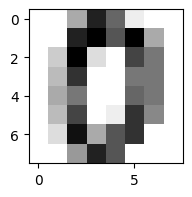

In [39]:
# Podemos visualizar la matriz como una imagen
plt.figure(figsize=(2,2))
plt.imshow(data.images[0], cmap=plt.cm.gray_r)
plt.show()

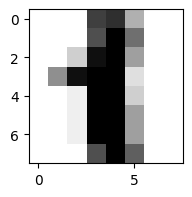

In [40]:
# Segundo dígito del dataset
# Podemos visualizar la matriz como una imagen
plt.figure(figsize=(2,2))
plt.imshow(data.images[1], cmap=plt.cm.gray_r)
plt.show()

1797


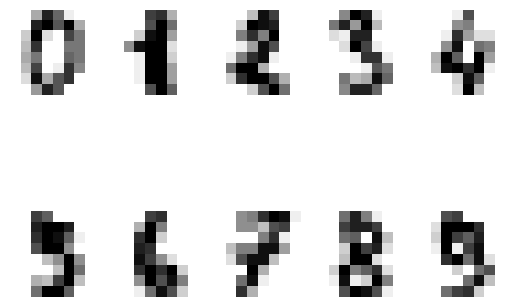

In [41]:
# ¿Cuántos dígitos hay en el dataset?
images = []
for i in range (len(data.target)):
    for digit in range(10): # Si borramos el for visualizaremos los 10 numeros 9 que hay
        if data.target[i] == digit:
            images.append(data.images[i])
print(len(images))

# Visualizar los primeros 10
for index in range(0, 10):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(images[index], cmap=plt.cm.gray_r)
plt.show()

178


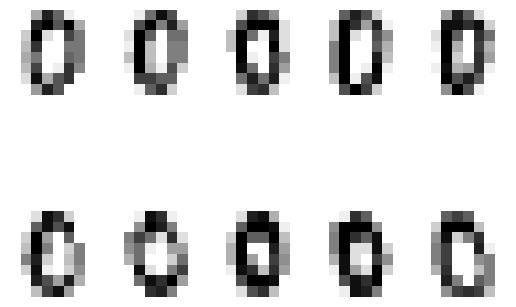

In [42]:
# ¿Cuántos dígitos cero hay en el dataset?
images = []
for i in range (len(data.target)):
    if data.target[i] == 0:
        images.append(data.images[i])
print(len(images))

# Visualizar los primeros 10
for index in range(0, 10):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(images[index], cmap=plt.cm.gray_r)
plt.show()

In [43]:
# ¿Cuántos muestras hay de cada digito en el dataset?
samples = np.zeros(10)
for i in range (len(data.target)):
    for digit in range(10):
        if data.target[i] == digit:
            samples[digit] += 1
print(samples)

[178. 182. 177. 183. 181. 182. 181. 179. 174. 180.]


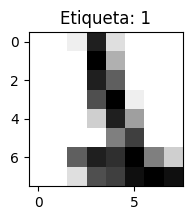

In [44]:
# Tomamos nuestro set de datos desde 'data'
image = data.images
labels = data.target

index = 1000

plt.figure(figsize=(2,2))
plt.imshow(image[index], cmap=plt.cm.gray_r)
plt.title('Etiqueta: %i' % labels[index])
plt.show()

## MLP

In [52]:
# Convert the nominal y values to binary
#X = normalize(data.data)
#y = data.target
y = to_categorical(y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [54]:
# MLP

clf = MultilayerPerceptron(n_hidden=16, n_iterations=1000, learning_rate=0.01)

clf.fit(X_train, y_train)


In [55]:
y_pred = np.argmax(clf.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)

Otra forma: 

mlp = MLPClassifier(activation = 'tanh', hidden_layer_sizes=(16,), max_iter=1000, learning_rate_init=0.01)

''' Entrenamos la red con n datos'''

n = 898

mlp.fit(normalizado[:n], labels[:n])

'''Verificamos sus predicciones para los datos restantes'''

esperado=labels[n:]
prediccion=mlp.predict(normalizado[n:])

''' mostramos los resultados'''

print("Informe de clasificación:" % metrics.classification_report(esperado, prediccion))

print("Matriz de Confusión:" % metrics.confusion_matrix(esperado, prediccion))

In [14]:
accuracy = accuracy_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred, average='macro')
#f1_score = f1_score(y_test, y_pred, average='macro')
#support = support(y_test, y_pred)
print ("Precisión del modelo::", accuracy)

Precisión del modelo:: 0.975


In [53]:
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusión:" )
print(confusion_matrix(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.89      1.00      0.94        34
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        33
           4       0.98      0.98      0.98        42
           5       0.97      0.92      0.94        37
           6       1.00      0.95      0.98        43
           7       0.97      1.00      0.98        31
           8       1.00      0.92      0.96        37
           9       0.93      1.00      0.97        28

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.98      0.97      0.98       360

Matriz de Confusión:
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  1  0  0]
 [ 0  0  0  0  1 34  0  0  0 

In [118]:
# ¿Cuales fueron los datos erróneos?
error = []
for i in range(len(y_pred)):
    if y_test[i] != y_pred[i]:
        error.append([y_test[i], y_pred[i]])
        
# Imprime los datos erróneos.
error
#Se esperaba un valor, y la maquina predijo otro valor.

[[5, 4], [5, 9], [8, 1], [8, 1], [6, 1], [8, 1], [4, 7], [5, 9], [6, 5]]

Que más mostrar:

    Bonus:
    Deberia haber alguna forma de dibujar, de dibujar el perceptron con sus capas internar.
    el sckit-learn.
    Graficar la clasificación, en barras.
    
    

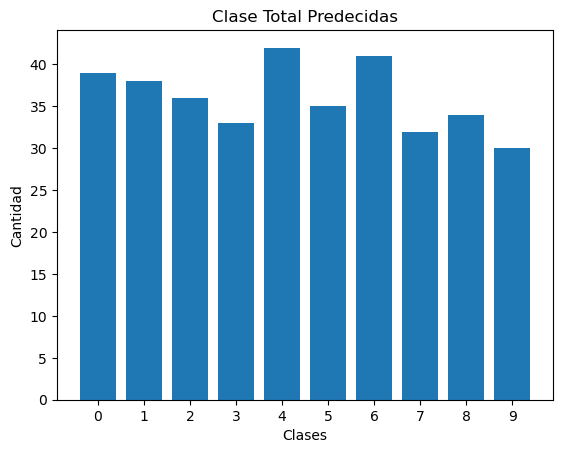

In [52]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
class_counts = np.bincount(y_pred)
plt.bar(class_names, class_counts)
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.title("Clase Total Predecidas")
plt.show()

In [86]:
def plot_confusion_matrix(cm, cmap="Blues", figsize=(10, 10)):
    # Set the figure size
    fig = plt.figure(figsize=figsize)

    # Add an axis to the figure
    ax = fig.add_subplot(111)

    # Create the image of the axis
    image = ax.matshow(cm.astype("float").T / cm.sum(axis=1), cmap=cmap)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.annotate(cm[i, j], (i, j), color="black", size=10)

    plt.show()


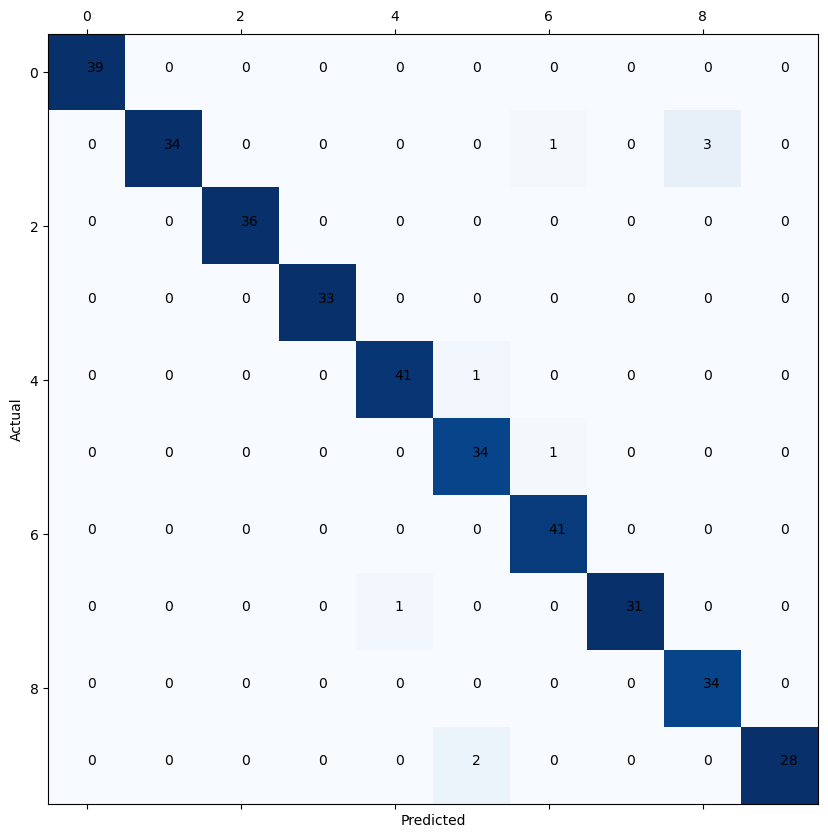

In [87]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [90]:
def voltear_parte_inferior(matriz):
  """
  Voltea la parte inferior de una matriz.

  Args:
    matriz: La matriz a voltear.

  Returns:
    La matriz volteada.
  """

  matriz_vuelta = matriz.copy()

  for i in range(len(matriz)):
    for j in range(i + 1, len(matriz)):
      matriz_vuelta[i][j], matriz_vuelta[j][i] = matriz_vuelta[j][i], matriz_vuelta[i][j]

  return matriz_vuelta
matriz_vuelta = voltear_parte_inferior(confusion_matrix(y_test, y_pred))
print(matriz_vuelta)

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  1  0  3  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 41  1  0  0  0  0]
 [ 0  0  0  0  0 34  1  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  1  0  0 31  0  0]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  2  0  0  0 28]]
